In [40]:
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
coords_dir = '/uio/lagringshotell/geofag/students/metos/hannasv/satelite_coordinates/msthesis/'

In [7]:
fil = glob.glob(coords_dir + "*input*.nc")[0]

In [9]:
co = xr.open_dataset(fil)

In [18]:
co1 =  co.sel(lat = slice(30,50), lon = slice(0, 25)) # , 

In [23]:
lats = co.latitude.values.reshape(-1)
lons = co.longitude.values.reshape(-1)

In [47]:
LATS = np.nanmean(co.latitude.values, axis=1)

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [45]:
LONS = np.nanmean(co.longitude.values, axis=0)

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [145]:
small = np.argwhere(LATS < 50)
both = np.argwhere(LATS > 30)
s = np.argwhere(LONS < 25)
b = np.argwhere(LONS > -15)

/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/uio/hume/student-u89/hannasv/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [146]:
co3 = co.isel(lat = both.reshape(-1).tolist(), lon = b.reshape(-1).tolist())
co3 = co3.isel(lat = slice(0,500), lon = slice(0, 1200))

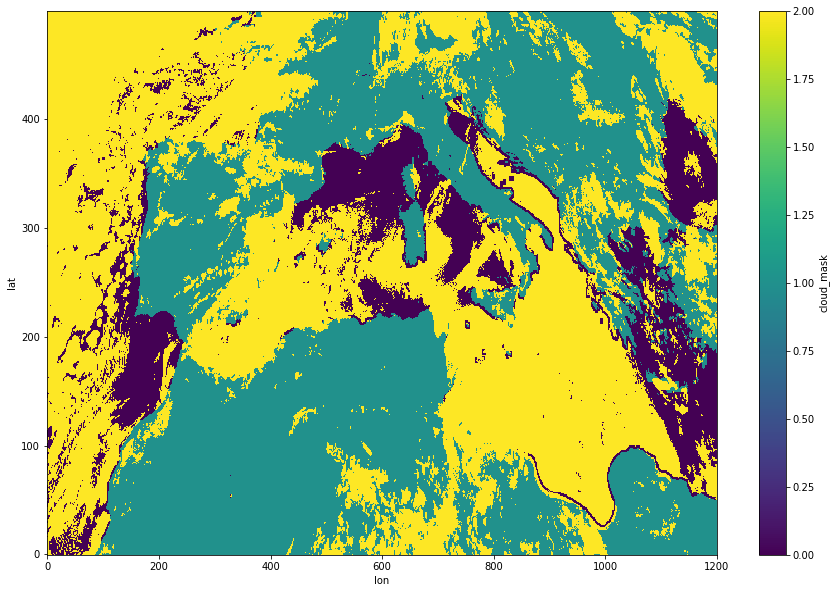

In [147]:
co3['cloudMask'].plot(figsize=(15, 10))

In [148]:
#data_dir = '/home/hanna/MS-suppl/files/'
data_dir = '/uio/hume/student-u89/hannasv/MS-suppl/'
sat_dir = '/uio/lagringshotell/geofag/projects/miphclac/hannasv/'
save_dir = '/uio/lagringshotell/geofag/students/metos/hannasv/satelite_data/'

In [149]:
sat_files = glob.glob(sat_dir + "*200408*.grb")

In [150]:
len(sat_files)

739

In [151]:
ds = xr.open_dataset(sat_files[0], engine = 'pynio')
print(ds)
ds = ds.isel(ygrid_0 = both.reshape(-1).tolist(), xgrid_0 = b.reshape(-1).tolist())
ds = ds.isel(ygrid_0 = slice(0,500), xgrid_0 = slice(0, 1200))

<xarray.Dataset>
Dimensions:               (xgrid_0: 3712, ygrid_0: 3712)
Dimensions without coordinates: xgrid_0, ygrid_0
Data variables:
    CLOUDM_P30_GSV0_I207  (ygrid_0, xgrid_0) float32 ...


In [152]:
def timestamp(filename):
    """
    Returns the numpy datetime 64 [ns] for the current date.
    This is a bit hardcoded at the moment ....
    """
    splits = filename.split('-')
    ts = splits[5]
    year = ts[:4]
    month = ts[4:6]
    day = ts[6:8]
    hr = ts[8:10]
    minuts = ts[10:12]
    sek = ts[12:14]
    # TODO make sure all filenames have seconds
    return np.datetime64( year+"-"+month+"-"+day+"T"+hr+":"+minuts+":"+sek )

In [154]:
failed = []

for i, fil in enumerate(sat_files):
    if i == 0:
        ds = xr.open_dataset(fil, engine = 'pynio')
        #print(ds)
        ds = ds.isel(ygrid_0 = both.reshape(-1).tolist(), xgrid_0 = b.reshape(-1).tolist())
        #ds = ds.isel(ygrid_0 = slice(0,500), xgrid_0 = slice(0, 1200))
        
        ts = timestamp(fil)
        ds['time'] = ts
        
        ds = ds.assign_coords(time = ds.time)
        ds = ds.expand_dims(dim = 'time')
        
    else:
        try:
            ds_temp = xr.open_dataset(fil, engine = 'pynio')
            ds_temp = ds_temp.isel(ygrid_0 = both.reshape(-1).tolist(), xgrid_0 = b.reshape(-1).tolist())
            #ds_temp = ds_temp.isel(ygrid_0 = slice(0,500), xgrid_0 = slice(0, 1200))
            
            ts = timestamp(fil)
            ds_temp['time'] = ts
            
            ds_temp = ds_temp.assign_coords(time = ds_temp.time)
            ds_temp = ds_temp.expand_dims(dim = 'time')
            ds = ds.merge(ds_temp)
            #print(ds)     
        except xr.MergeError:
            failed.append(fil)
    if i%10==0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


KeyboardInterrupt: 

In [155]:
ds

<xarray.Dataset>
Dimensions:               (time: 248, xgrid_0: 2225, ygrid_0: 803)
Coordinates:
  * time                  (time) datetime64[ns] 2004-08-01 ... 2004-08-11T07:00:00
Dimensions without coordinates: xgrid_0, ygrid_0
Data variables:
    CLOUDM_P30_GSV0_I207  (time, ygrid_0, xgrid_0) float32 1.0 1.0 ... 3.0 3.0

In [157]:
import xarray as xr
import holoviews as hv
hv.extension('matplotlib')

da = ds['CLOUDM_P30_GSV0_I207']
da.coords['xgrid_0'] = np.arange(2225).tolist() 
da.coords['ygrid_0'] = np.arange(803).tolist() 

#da

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [158]:
#air = xr.tutorial.load_dataset('air_temperature')
dA = hv.Dataset(da) # .isel(time = slice(0, 500))
images = dA.to(hv.Image, ['xgrid_0', 'ygrid_0']).options(fig_inches=(15, 10), colorbar=True, cmap='viridis')

In [159]:
%output holomap='mp4'

images

:HoloMap   [time]
   :Image   [xgrid_0,ygrid_0]   (CLOUDM_P30_GSV0_I207)

In [160]:
renderer = hv.renderer('matplotlib')
renderer.save(images, '/uio/hume/student-u89/hannasv/working_movie_3', 'mp4')